### Rings
A Ring $(R, +, \cdot)$ is a set $R$ equipped with two binary operations, addition ($+$) and multiplication ($\cdot$), satisfying the following axioms:
- $(R, +)$ is an Abelian Group: It is closed under addition, associative, has an identity, and every element has an additive inverse.
- Multiplication is Associative: $(a \cdot b) \cdot c = a \cdot (b \cdot c)$ for all $a, b, c \in R$.
- Distributive Law: Multiplication distributes over addition: $a \cdot (b + c) = a \cdot b + a \cdot c$ and $(b + c) \cdot a = b \cdot a + c \cdot a$.

##### Commutative Rings
A Commutative Ring is a ring $(R, +, \cdot)$ where the multiplication operation is commutative. That is, for all $a, b \in R$:$$ab = ba$$While all rings must be commutative under addition, only "nice-enough" rings like the integers ($\mathbb{Z}$) or polynomials ($\mathbb{R}[x]$) are commutative under multiplication. Rings of matrices are the most common example of non-commutative rings.


##### Units
An element $u \in R$ is a unit if it has a multiplicative inverse ($u^{-1}$) in the ring such that $$uu^{-1} = 1$$


##### Zero Devisors
A non-zero element $a \in R$ is a zero divisor if there exists another non-zero element $b \in R$ such that:$$ab = 0$$

##### Ring with Unity
A ring that contains a multiplicative identity, such that $a \cdot 1 = 1 \cdot a = a$.

##### Characteristic of a Ring
The characteristic of a ring $R$, denoted $\text{char}(R)$, is the smallest positive integer $n$ such that adding the multiplicative identity ($1$) to itself $n$ times results in the additive identity ($0$):
$$\underbrace{1 + 1 + \dots + 1}_{n \text{ times}} = 0$$ 
If no such $n$ exists, the ring is said to have characteristic $0$ . In an Integral Domain, the characteristic must be either $0$ or a prime number $p$. Characteristic $= 0$ means the ring is like an infinite line; you can keep adding $1$ forever and you will just keep getting larger numbers.

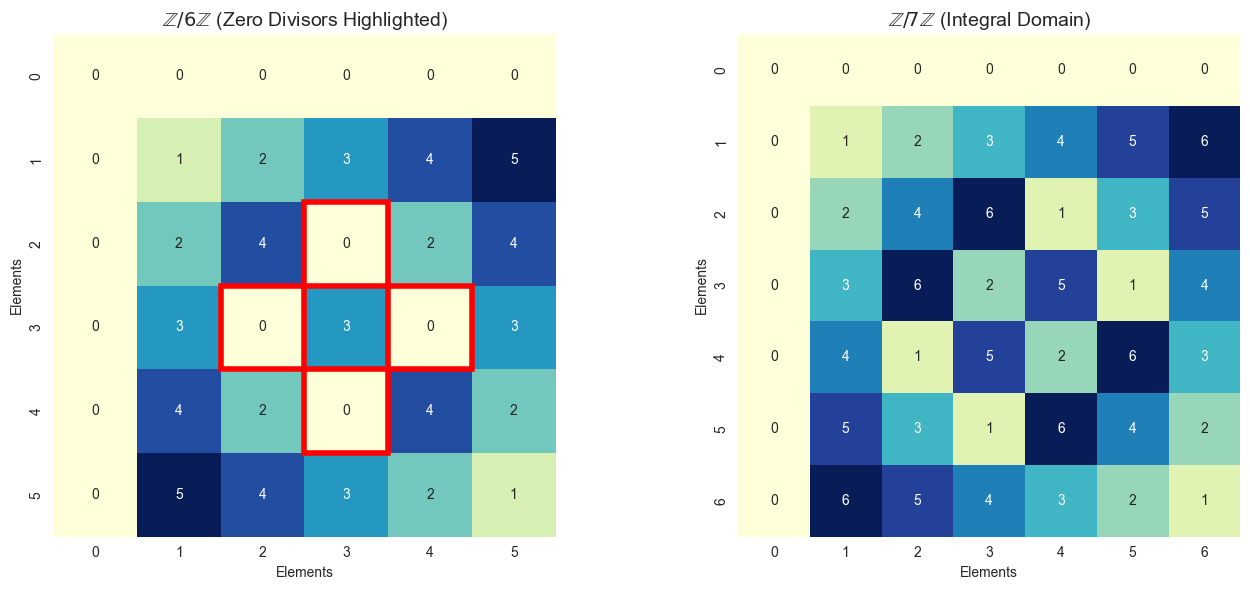

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_multiplication_table(n):
    table = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            table[i, j] = (i * j) % n
    return table

def plot_comparison():
    n1, n2 = 6, 7
    table1 = get_multiplication_table(n1)
    table2 = get_multiplication_table(n2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for Z/6Z
    # Identify zero divisors: x*y=0 where x,y != 0
    zero_divisors_mask1 = np.zeros_like(table1, dtype=bool)
    for i in range(1, n1):
        for j in range(1, n1):
            if table1[i, j] == 0:
                zero_divisors_mask1[i, j] = True

    sns.heatmap(table1, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0], cbar=False, square=True)
    for i in range(n1):
        for j in range(n1):
            if zero_divisors_mask1[i, j]:
                axes[0].add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=4))
    
    axes[0].set_title(r"$\mathbb{Z}/6\mathbb{Z}$ (Zero Divisors Highlighted)", fontsize=14)
    axes[0].set_xlabel("Elements")
    axes[0].set_ylabel("Elements")
    
    # Plot for Z/7Z
    sns.heatmap(table2, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1], cbar=False, square=True)
    axes[1].set_title(r"$\mathbb{Z}/7\mathbb{Z}$ (Integral Domain)", fontsize=14)
    axes[1].set_xlabel("Elements")
    axes[1].set_ylabel("Elements")

    plt.tight_layout()
    plt.show()

plot_comparison()


### Integral Domain
An Integral Domain is a commutative ring with unity (3$1 \neq 0$) that has no zero divisors.4 This means if $ab = 0$, then $a = 0$ or $b = 0$
- Infinite Integral Domains: The most classic example is the set of integers 5$\mathbb{Z}$.6 It is infinite, and you can never multiply two non-zero integers to get zero.

##### Division Ring
A ring with unity where every non-zero element has a multiplicative inverse ($a^{-1}$).

### Fields
A Field $(F, +, \cdot)$ is a commutative ring with unity ($1 \neq 0$) such that every non-zero element has a multiplicative inverse.

Rings are about interaction (having two operations), then Fields are the foundation for completeness.


### Ideals
An Ideal $I$ of a ring $R$ is a subring with a "sticky" multiplication property. Formally, $I$ is an ideal if:
- $(I, +)$ is a subgroup of $(R, +)$.
- For every $i \in I$ and every $r \in R$, both $ri \in I$ and $ir \in I$.

Its like a black whole. If you multiply any element from the entire ring by an element inside the ideal, the result is sucked back into the ideal.

##### Inverse of an Ideal
In certain advanced rings, we can define the "inverse" of an ideal. Given an ideal $A$, its inverse $A^{-1}$ is defined as the set of elements in the field of fractions $K$ that "map $A$ back into the ring":$$A^{-1} = \{x \in K \mid xA \subseteq R\}$$

##### Prime Ideals
A proper ideal $P$ in a commutative ring $R$ is a Prime Ideal if, whenever the product of two elements is in $P$, at least one of those elements must be in $P$:$$ab \in P \implies a \in P \text{ or } b \in P$$

##### Maximal Ideals
A proper ideal $M$ in a ring $R$ is a Maximal Ideal if there are no other ideals "between" $M$ and $R$. In other words, if $J$ is an ideal such that $M \subseteq J \subseteq R$, then either $J = M$ or $J = R$.

The relationship between Rings and Fields is mediated by Maximal Ideals. You can turn any commutative ring into a field by "dividing" it by its largest possible sub-structure. This is a powerful way to "create" new number systems to solve specific equations.

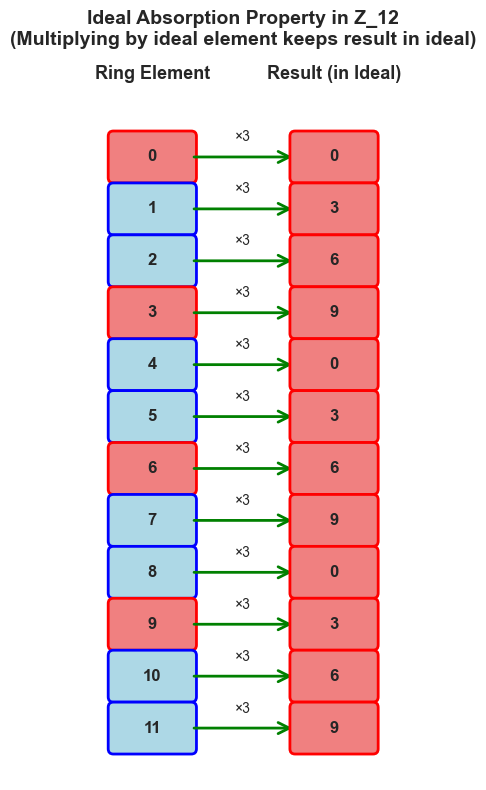

In [21]:
def visualize_ideal_absorption():
    fig, ax = plt.subplots(figsize=(10, 8))
    
    n = 12
    ideal = [0, 3, 6, 9]  
    
    ring_elements = list(range(n))
    
    for i, elem in enumerate(ring_elements):
        y_pos = 11 - i
        
        if elem in ideal:
            rect = FancyBboxPatch((0, y_pos-0.4), 1.5, 0.8, 
                                 boxstyle="round,pad=0.1", 
                                 facecolor='lightcoral', edgecolor='red', linewidth=2)
        else:
            rect = FancyBboxPatch((0, y_pos-0.4), 1.5, 0.8, 
                                 boxstyle="round,pad=0.1", 
                                 facecolor='lightblue', edgecolor='blue', linewidth=2)
        ax.add_patch(rect)
        ax.text(0.75, y_pos, str(elem), ha='center', va='center', fontsize=12, fontweight='bold')
        
        ideal_elem = 3
        product = (elem * ideal_elem) % n
        
        arrow = FancyArrowPatch((1.5, y_pos), (3.5, y_pos),
                              arrowstyle='->', mutation_scale=20, linewidth=2, color='green')
        ax.add_patch(arrow)
        ax.text(2.5, y_pos + 0.3, f'×{ideal_elem}', ha='center', fontsize=10)
        
        result_rect = FancyBboxPatch((3.5, y_pos-0.4), 1.5, 0.8, 
                                    boxstyle="round,pad=0.1", 
                                    facecolor='lightcoral', edgecolor='red', linewidth=2)
        ax.add_patch(result_rect)
        ax.text(4.25, y_pos, str(product), ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.text(0.75, 12.5, 'Ring Element', ha='center', fontsize=13, fontweight='bold')
    ax.text(4.25, 12.5, 'Result (in Ideal)', ha='center', fontsize=13, fontweight='bold')
    
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-1, 13)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Ideal Absorption Property in Z_12\n(Multiplying by ideal element keeps result in ideal)', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('ideal_absorption.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_ideal_absorption()

### Key constructions of new rings from old rings

##### Quotient Ring
A Quotient Ring $R/I$ is constructed by partitioning a ring $R$ into cosets of an ideal $I$. The elements of this new ring are the sets $r + I$.Addition: $(a + I) + (b + I) = (a + b) + I$Multiplication: $(a + I)(b + I) = (ab) + I$


##### Polynomial Ring 
Given a ring $R$, the Polynomial Ring $R[x]$ is the set of all formal sums $a_n x^n + \dots + a_1 x + a_0$, where the coefficients $a_i$ are elements of $R$.

If $R$ is an integral domain, then $R[x]$ is also an integral domain. If $F$ is a field, $F[x]$ behaves very much like the integers, allowing for a division algorithm and unique factorization into irreducible polynomials.

##### Matrix Ring
A Matrix Ring consists of all $n \times n$ matrices whose entries are taken from a ring $R$.

Even if $R$ is commutative, $M_n(R)$ is non-commutative for $n \ge 2$. These rings are essential for representing linear transformations and are prone to having many zero divisors (any matrix with a determinant of 0).

##### Group Ring
A Group Ring combines a ring $R$ and a group $G$ (Denoted as $R[G]$). Elements are formal linear combinations of group elements with coefficients from the ring: $\sum_{g \in G} a_g g$. 

This structure allows us to study group theory using the powerful tools of ring theory. It is the foundation for Representation Theory, where groups are studied by acting on vector spaces.

##### Direct Product of Rings
The Direct Product (or Direct Sum) of two rings $R$ and $S$ is the set of ordered pairs $(r, s)$ with component-wise addition and multiplication. (Denoted as : $R \times S$)

Note: $(1, 0) \times (0, 1) = (0, 0)$, which means direct products of non-zero rings always contain zero divisors. Therefore, the direct product of two fields is never itself a field.

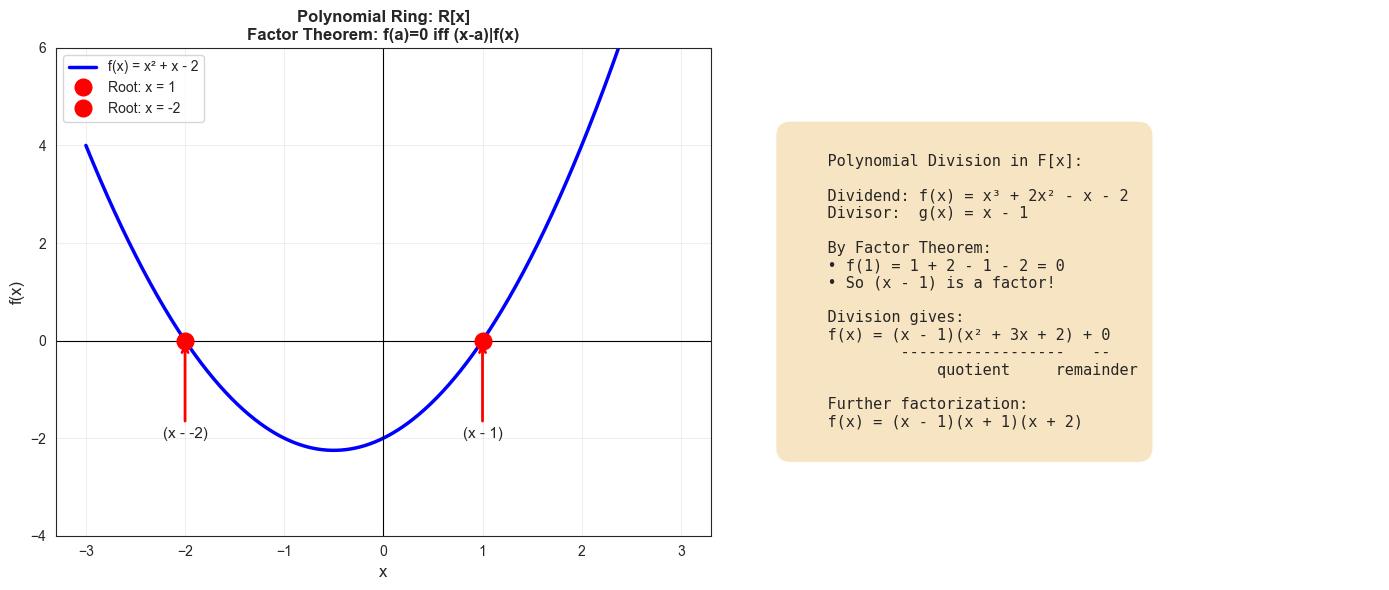

In [35]:
def visualize_polynomial_ring():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    x = np.linspace(-3, 3, 500)
    y = x**2 + x - 2
    
    ax1.plot(x, y, 'b-', linewidth=2.5, label='f(x) = x² + x - 2')
    ax1.axhline(y=0, color='black', linewidth=0.8)
    ax1.axvline(x=0, color='black', linewidth=0.8)
    ax1.grid(True, alpha=0.3)
    
    roots = [1, -2]
    for root in roots:
        ax1.plot(root, 0, 'ro', markersize=12, label=f'Root: x = {root}')
        ax1.annotate(f'(x - {root})', xy=(root, 0), xytext=(root, -2),
                    fontsize=11, ha='center',
                    arrowprops=dict(arrowstyle='->', color='red', lw=2))
    
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.set_title('Polynomial Ring: R[x]\nFactor Theorem: f(a)=0 iff (x-a)|f(x)', 
                 fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.set_ylim(-4, 6)
    
    ax2.axis('off')
    
    division_text = """
    Polynomial Division in F[x]:
    
    Dividend: f(x) = x³ + 2x² - x - 2
    Divisor:  g(x) = x - 1
    
    By Factor Theorem:
    • f(1) = 1 + 2 - 1 - 2 = 0
    • So (x - 1) is a factor!
    
    Division gives:
    f(x) = (x - 1)(x² + 3x + 2) + 0
            ------------------   --
                quotient     remainder
    
    Further factorization:
    f(x) = (x - 1)(x + 1)(x + 2)
    """
    
    ax2.text(0.1, 0.5, division_text, fontsize=11, family='monospace',
            verticalalignment='center', bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.8, pad=1))
    
    plt.tight_layout()
    plt.show()


visualize_polynomial_ring()

### Key Theorems
See lean file for proof of the following theorems.

##### Factor Theorem 
A polynomial $f(x) \in F[x]$ has a factor $(x - a)$ if and only if $f(a) = 0$.

A tool for connecting geometry and algebra, it tells us that finding the roots of an equation is identical to finding the "linear building blocks" of the polynomial. In Linear Algebra, this is the logic used to find Eigenvalues: we find the roots of the characteristic polynomial $\det(A - \lambda I) = 0$.

##### Polynomial Remainder Theorem
When a polynomial $f(x)$ is divided by a linear divisor $(x - a)$, the remainder is exactly $f(a)$.


##### Chinese Remainder Theorem 
If $n_1, n_2, \dots, n_k$ are pairwise coprime positive integers, then the system of simultaneous congruences $x \equiv a_i \pmod{n_i}$ has a unique solution modulo $N = n_1 n_2 \dots n_k$.

In Ring Theory, this is expressed as an isomorphism: $R/(I \cap J) \cong R/I \times R/J$. It means a large, complex system can be broken down into smaller, independent components that are easier to solve. It is the basis for high-speed computer arithmetic and parallel processing.

##### Theorem: Finite Integral Domains are Fields
Every integral domain that contains a finite number of elements must be a field.

This means that in a finite set, the no zero divisors property is so restrictive that it forces every non-zero element to have a multiplicative inverse. This is why $\mathbb{Z}_p$ is always a field if $p$ is prime.

##### Characteristic of an Integral DomainDefinition
The characteristic of an integral domain $D$ is either $0$ or a prime number $p$.

In a general ring, the characteristic could be composite (like $\mathbb{Z}_6$ having char 6). But in an integral domain, if the characteristic were composite (say $n = ab$), you would have $(a \cdot 1)(b \cdot 1) = 0$, implying zero divisors. Therefore, the characteristic must be prime to maintain the integrity of the domain.

##### Cancellation Law 
In an integral domain $D$, if $a, b, c \in D$, $a \neq 0$, and $ab = ac$, then $b = c$.

This is the theorem that allows us to divide without technically having a field. In a general ring, you can't always cancel $a$ (it might be a zero divisor).

##### Primality and Maximality
An ideal $P$ is prime if and only if $R/P$ is an Integral Domain.

An ideal $M$ is maximal if and only if $R/M$ is a Field.

These theorems define the strength of an ideal based on the quality of the quotient ring it produces. A Prime Ideal ($P$) is strong enough to eliminate zero divisors in the quotient. A Maximal Ideal ($M$) is so strict that it forces every non-zero element in the quotient to have an inverse.